In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

/#Keeps the randomness... not random
SEED = 'random'
np.random.seed(sum([ord(c) for c in SEED]))

In [2]:
def get_col(Pts,col):
    return [row[col] for row in Pts]

In [3]:

def plot_points(Cls, Mu, color, k, init, iteration):
    for i in range(k):
        if not init:
            Pt = Cls[i]
            c = color
        else:
            Pt = Cls
            c = []
            c.append('lightblue')
        plt.scatter(get_col(Pt,0), get_col(Pt,1), s = 50, facecolors = 'none', edgecolors = c[i], marker = '^')
    plt.scatter(get_col(Mu,0), get_col(Mu,1),  s = 50, c = color)

    for i in range(k):
        j = 0
        if init:
            temp = Cls
            Cls = []
            Cls.append(temp)
        for x, y in zip(get_col(Cls[i],0),get_col(Cls[i],1)):
            plt.text(x, y , s = Cls[i][j], verticalalignment = 'bottom', horizontalalignment = 'center', fontsize = 8)
            j += 1
    i = 0
    for x, y in zip(get_col(Mu,0),get_col(Mu,1)):
        plt.text(x, y , s = Mu[i], verticalalignment = 'bottom', horizontalalignment = 'center', fontsize = 8)
        i += 1
    if (init):
        plt.title("Initial Points")
        plt.savefig("iter1_init.jpg")
    else :
        plt.title("Iteration "+ (iteration))
        plt.savefig("iter"+iteration)
    plt.show()

In [4]:
def distanceAndClassify(Mu, Pts):
    dist = []
    temp_dist = []
    Mu = np.asarray(Mu)
    Pts = np.asarray(Pts)
    for k in range(len(Pts)):
        sub = []
        for i in range(len(Mu)):
            sub.append(np.sqrt(((Pts[k]-Mu[i])**2).sum()))
        dist.append(sub.index(min(sub)))
    return dist

In [5]:
def ClassifyPlot(Pts, C, k):
    cl = []
    temp = []
    for i in range(k):
        temp = []
        for j in range(len(Pts)):
            if C[j] == i:
                temp.append(Pts[j])           
        cl.append(temp) 
    return cl

In [6]:
def CompMu(Cls, k): 
    Mu_new= []
    Mu = []
    for i in range(k):
        Mu_new= []
        for j in range(len(Cls[0][0])):
            Mu_new.append(np.around((np.asarray(get_col(Cls[i], j))).mean(),3))
        Mu.append(Mu_new)
    return Mu

In [7]:
def k_means(Mu, Pts, color):
    for i in range(2): #Set number of iterations
        cl = distanceAndClassify(Mu,Pts)
        print ("Classification Vector : " + str(cl))
        Classification = ClassifyPlot(Pts,cl, k)

        plot_points(Classification,Mu, color, k, 0, str(i+1)+str('_a'))
        print("Mu before updation : " + str(Mu))
        Mu = CompMu(Classification, 3)
        plot_points(Classification, Mu, color, k, 0, str(i+1)+str('_b'))
        print("Mu after updation : " + str(Mu))

# Main

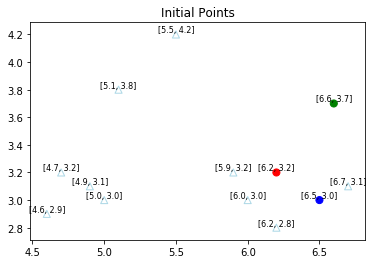

Classification Vector : [0, 0, 2, 0, 1, 0, 0, 2, 0, 0]


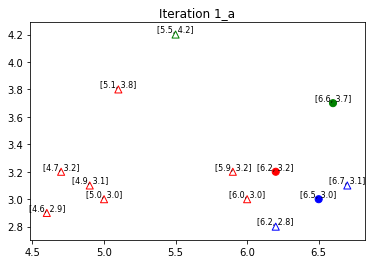

Mu before updation : [[6.2, 3.2], [6.6, 3.7], [6.5, 3.0]]


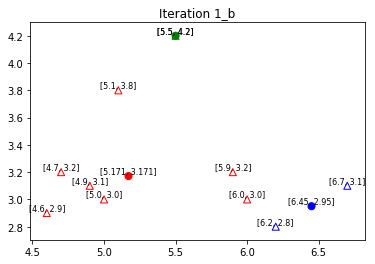

Mu after updation : [[5.171, 3.171], [5.5, 4.2], [6.45, 2.95]]
Classification Vector : [2, 0, 2, 0, 1, 0, 0, 2, 1, 2]


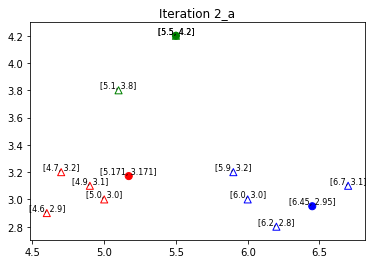

Mu before updation : [[5.171, 3.171], [5.5, 4.2], [6.45, 2.95]]


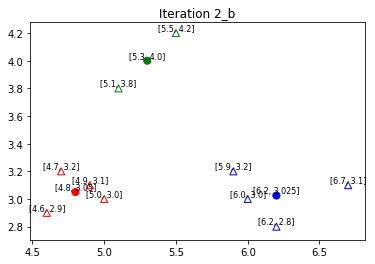

Mu after updation : [[4.8, 3.05], [5.3, 4.0], [6.2, 3.025]]


In [8]:
k = 3
#Initial Mu centers. They can also be set to random.
Mu = [[6.2,3.2],[6.6,3.7],[6.5,3.0]]
#
Pts = [[5.9,3.2],[4.6,2.9],[6.2,2.8],[4.7,3.2],[5.5,4.2],[5.0,3.0],[4.9,3.1],[6.7,3.1],[5.1,3.8],[6.0,3.0]]

color = ['r','g','b']
plot_points(Pts, Mu, color, 1, 1, 0)
k_means(Mu, Pts, color)